# Descriptive Statistics

In [1]:
# importing necessary libraries
import pandas as pd

# reading the data from the file
df = pd.read_excel('../Data Preprocessing & Cleaning/encoded_car_data.xlsx')

In [2]:
df.describe()

,Fuel type,Body type,Kilometers driven,transmission,ownerNo,model,modelYear,variantName,price,Registration Year,Insurance Validity,Mileage(kmpl),Engine(CC),Max Power(bhp),Torque(Nm),City
count,7853.000000,7853.000000,7853.000000,7853.000000,7853.000000,7853.000000,7853.000000,7853.000000,7.853000e+03,7853.000000,7853.000000,7853.000000,7853.000000,7853.000000,7853.000000,7853.000000
mean,3.041258,5.349293,57245.255062,0.743920,1.320769,120.201197,2016.661658,1046.777919,8.079587e+05,2016.729148,3.788488,19.348359,1373.762638,99.997110,167.486217,2.429135
std,1.407653,2.242861,33613.844189,0.436495,0.558930,64.968653,3.609329,594.972918,7.077646e+05,3.599416,1.453283,3.336193,388.680952,34.853963,91.810705,1.707234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,1.000000e+05,2006.000000,0.000000,8.000000,0.000000,34.200000,4.800000,0.000000
25%,1.000000,3.000000,30022.000000,0.000000,1.000000,65.000000,2014.000000,508.000000,4.000000e+05,2014.000000,2.000000,17.190000,1197.000000,78.900000,110.000000,1.000000
50%,4.000000,7.000000,53000.000000,1.000000,1.000000,124.000000,2017.000000,1113.000000,6.000000e+05,2017.000000,5.000000,19.160000,1199.000000,88.500000,138.000000,2.000000
75%,4.000000,8.000000,79000.000000,1.000000,2.000000,157.000000,2019.000000,1610.000000,9.100000e+05,2019.000000,5.000000,21.400000,1498.000000,117.600000,200.000000,4.000000
max,4.000000,9.000000,260000.000000,1.000000,3.000000,262.000000,2023.000000,1949.000000,5.200000e+06,2023.000000,6.000000,30.460000,2835.000000,241.300000,500.000000,5.000000


In [3]:
df.median()         # finding the median of the data

Fuel type                  4.00
Body type                  7.00
Kilometers driven      53000.00
transmission               1.00
ownerNo                    1.00
model                    124.00
modelYear               2017.00
variantName             1113.00
price                 600000.00
Registration Year       2017.00
Insurance Validity         5.00
Mileage(kmpl)             19.16
Engine(CC)              1199.00
Max Power(bhp)            88.50
Torque(Nm)               138.00
City                       2.00
dtype: float64

In [4]:
df.mode()           # finding the mode of the data

,Fuel type,Body type,Kilometers driven,transmission,ownerNo,model,modelYear,variantName,price,Registration Year,Insurance Validity,Mileage(kmpl),Engine(CC),Max Power(bhp),Torque(Nm),City
0,4,3,120000,1,1,51,2018,1616,650000.0,2018,5,18.9,1197,88.5,113.0,3


# Data Visualization

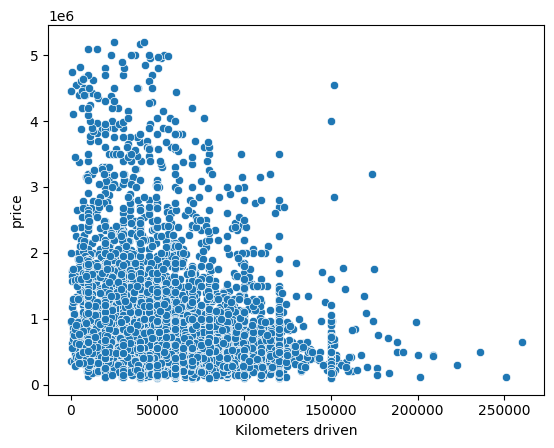

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Kilometers driven vs price
sns.scatterplot(x='Kilometers driven', y='price', data=df)
plt.show()

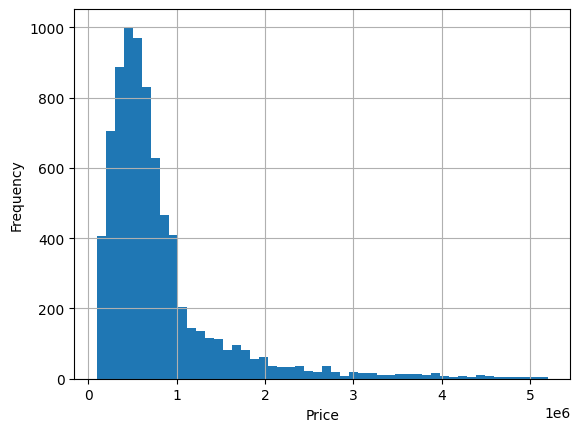

In [6]:
df['price'].hist(bins=50)   # Histogram of price column with 50 bins 
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

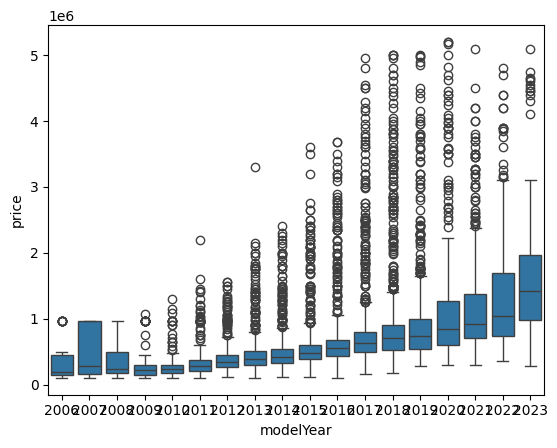

In [7]:
sns.boxplot(x='modelYear', y='price', data=df)
plt.show()

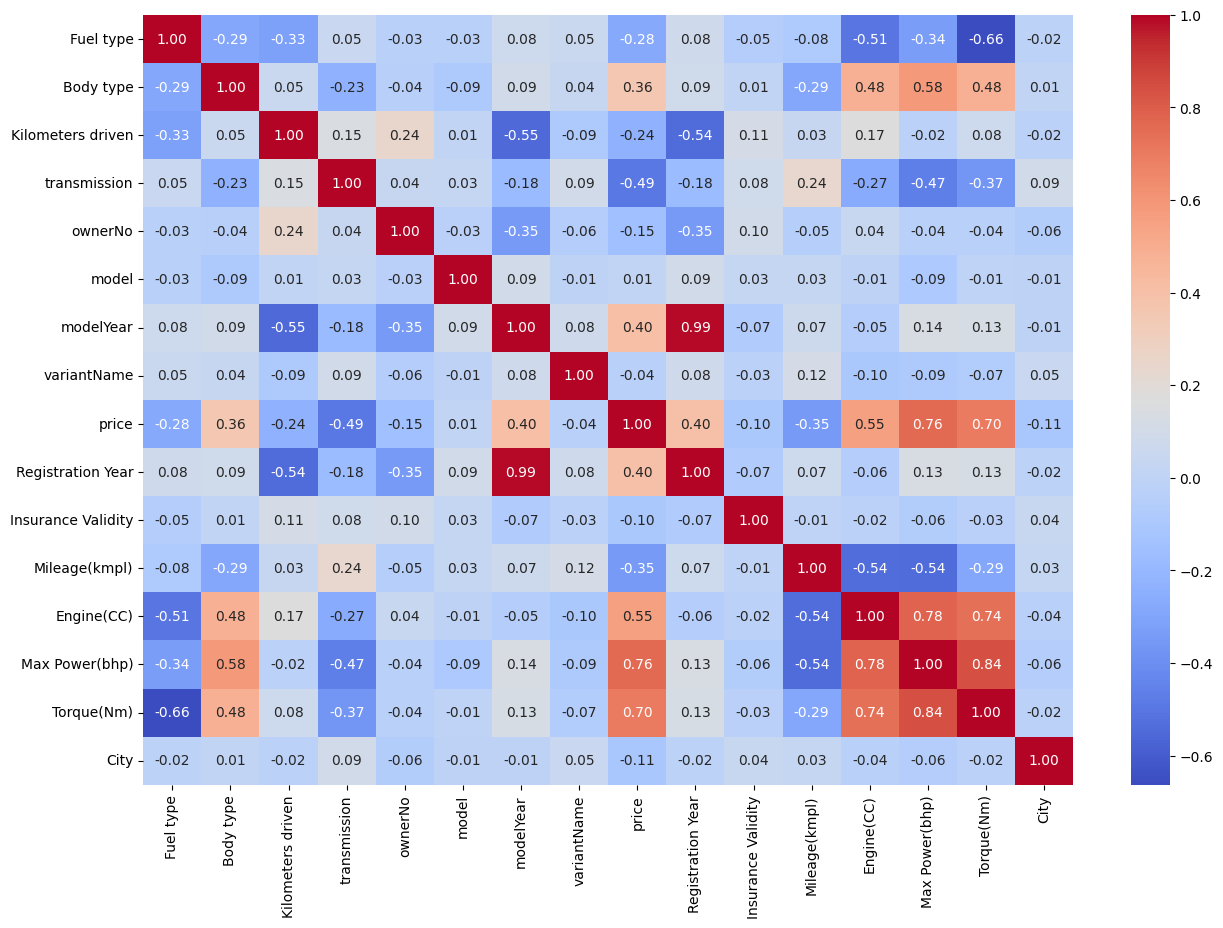

In [8]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(15,10))  # Increase the size of the plot

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.show()

## Feature Selection

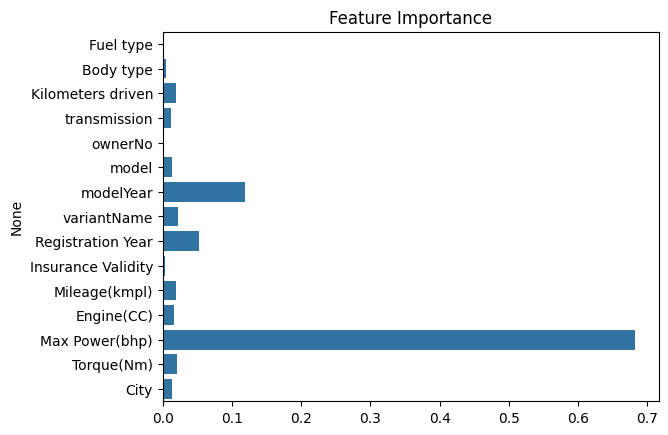

In [9]:
from sklearn.ensemble import  RandomForestRegressor

# feature and target variable
x = df.drop(columns=['price'])      # Dropping columns not relevant for training
y = df['price']

# Random Forest Model
model = RandomForestRegressor()
model.fit(x, y)

# Feature importance
importance = model.feature_importances_
feature_names = x.columns

# plotting feature importance
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importance')
plt.show()

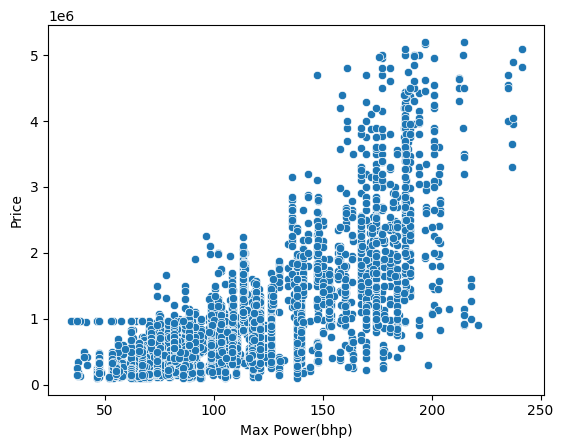

In [10]:
# Scatter plot of Max Power (bhp) vs Price
sns.scatterplot(data=df, x='Max Power(bhp)', y='price')
plt.ylabel('Price')
plt.show()